In [41]:
# modules
from pathlib import Path
from datetime import datetime
import xarray as xr # note, also needs netcdf4 library installed
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Specify the data locations relative to the notebook
sim_path = Path("/home/local/kck540/SUMMA-Projects/Summa-Actors/utils/laugh_tests/celia1990/output")
sim_name = "summa-actors_celia1990GRU1-1_timestep.nc"

In [43]:
# Specify plotting dimensions
timesteps = [10,32,49]
midToto = 0

In [44]:
# Specify the base time
time_ref = datetime.strptime('2000-01-01 0:00:00', '%Y-%m-%d %H:%M:%S')

In [45]:

# Load the data
ds = xr.open_dataset( sim_path / sim_name ).isel(hru=0, gru=0).load()

In [46]:
# Remove the mising data layers
ds = ds.where(ds['mLayerDepth'] != -9999, drop=True)

In [47]:
# Ensure that we can actually read the figure labels
font = {'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

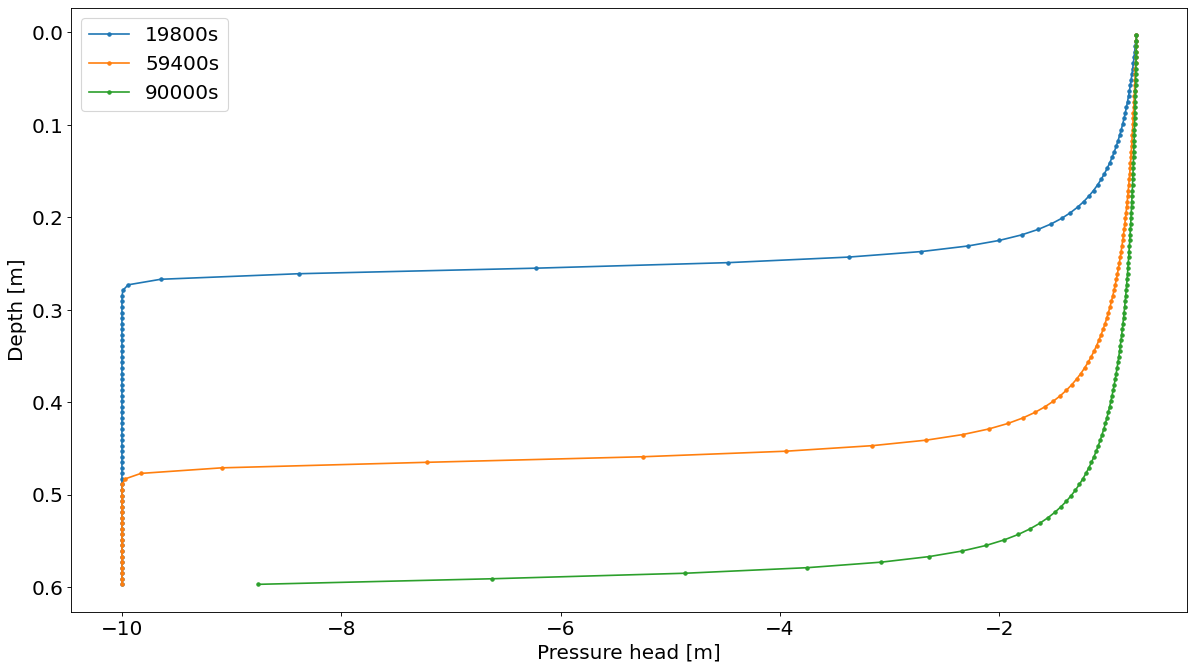

In [48]:
# Open a figure
fig = plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k');

# Plot the data
for time in timesteps:
    
    # legend label
    time_cur = ds['time'][time].dt.round('s') # Extract time @ timestep, rounded to the nearest second
    time_dif = pd.to_datetime(time_cur.data) - time_ref # time_cur is a datetime64 object, needs to be datetime
    lbl = str(round(time_dif.total_seconds())) + 's' # round() gets rid of the decimal 0 that's added by default
    
    # data
    plt.plot(ds['mLayerMatricHead'].isel(time=time,midToto=midToto), ds['mLayerHeight'].isel(time=time), \
             marker='.', label=lbl);

# Make sure that increasing depth points downward
plt.gca().invert_yaxis()

# Labels
plt.xlabel('Pressure head [m]'); # note, ';' supresses output from the Text object that is created for the labels
plt.ylabel('Depth [m]');
plt.legend();

# Save the figure
plt.savefig('summa-actors-lt1_celia1990.png');